## Numpy 모듈
- 과학 기술 계산을 위한 라이브러리
- 행렬/배열 처리 및 연산 
- 난수 생성 
- 참고: https://numpy.org/doc/stable/index.html

- 머신러닝은 보통 코랩을 많이 사용 (GPU 필요하기 때문)

In [ ]:
# 모듈 연결
import numpy as np

### 1차원(1D) 배열 구조 

In [ ]:
listD = [20, 10, 15, 8, 9, 10] 
print(type(listD))
print(listD)               # 리스트형 -> 쉼표로 구분, 각각의 데이터 보여줌 

<class 'list'>
[20, 10, 15, 8, 9, 10]


In [ ]:
print(type(np.array(listD)))
print(np.array(listD))      # 벡터형 -> 쉼표 X, 리스트와 달라 

<class 'numpy.ndarray'>
[20 10 15  8  9 10]


In [ ]:
print(listD.shape)
# 에러) 리스트 자체는 구조적인 부분을 볼 수 없음!

AttributeError: ignored

In [ ]:
# 배열의 차원 튜플 구조로 표시 
print(np.array(listD).shape) # 1차원, 6개 데이터

(6,)


In [ ]:
# 1차원 데이터 관리
arr = np.array(listD)
print(arr)
# 데이터 출력 
print(arr[0],arr[3] )

[20 10 15  8  9 10]
20 8


In [ ]:
# 데이터 수정 
arr[1] = 22
print(arr)

[20 22 15  8  9 10]


In [ ]:
list1 = [[10,20,30],[12,25,35]]
arr = np.array(list1)

# 구조 확인 
print(arr.shape)

# 차원 확인 (.ndim)
print(arr.ndim)

# 전체 데이터 갯수 (.size)
print(len(list1))                    # 차원 갯수
print(len(list1[0]) + len(list1[1])) # 2차원 원소 갯수  
print(arr.size)

# 데이터 타입 확인 (.dtype)
print(arr.dtype)


# 원소 크기 확인 (.itemsize)
print(arr.itemsize)  # 결과: 8비트 (64비트) / 4비트 (32비트) -> 사용하는 컴퓨터의 사황에 따라 다르게 나옴 

# 원소와 하나의 행의 크기 (.strides) -> 등간격
# numpy에서는, 각 dimensions를 건너가는데 몇 bytes나 뛰어넘어야 하는지에 대한 정보
print(arr.strides) # 결과) (24, 8) 24=원소수(3)*원소크기(8비트) , 원소크기(8)


(2, 3)
2
8
2
6
6
int64
(24, 8)


### ndarray 생성 
- 기본적으로 vectorization과 broadcasting을 지원 
- `list`, `tuple` 등의 시퀀스 자료형으로 구성할 수 있으며 내부 요소의 자료형은 모두 동일한 타입으로만 가질 수 있음 (딕셔너리 X)
- 자료의 크기도 고정되어 있음 

In [ ]:
arr = np.array((1, 2, 3)) # 정수
print(arr)
print(arr.dtype)
print(arr.shape) 

[1 2 3]
int64
(3,)


In [ ]:
arr = np.array((1, 2, 3.)) # 뒤에 '.' 붙여주면 모든 숫자 소수로 바뀜
print(arr)
print(arr.dtype)
print(arr.shape) 
# 데이터 중 하나라도 실수형이 있다면 모두 실수형으로 바뀜 

[1. 2. 3.]
float64
(3,)


In [ ]:
arr = np.array(((1, 2, 3.), (10, 20, "30")))  # 2차원 
print(arr)
print(arr.dtype)
print(arr.shape) 
# 문자형이 가장 큰 데이터형이기 떄문데 모든 원소 문자형으로 바뀜 
# 실제 출력은 벡터형 

[['1' '2' '3.0']
 ['10' '20' '30']]
<U32
(2, 3)


In [ ]:
arr = np.array(([(1, 2, 3.), (10, 20, "30")],
                [(1, 33, 25), (15, 20.0, 35)]
                ))  
print(arr)
print(arr.dtype)
print(arr.shape) 

# 1차원: (1차 원소수,) / 2차원: (1차 , 2차 원소수) / 3차원: (1차, 2차, 3차 원소수) ?

[[['1' '2' '3.0']
  ['10' '20' '30']]

 [['1' '33' '25']
  ['15' '20.0' '35']]]
<U32
(2, 2, 3)


In [ ]:
arr = np.array(([(1, 2, 3.), (10, 20, "30")],
                [(1, 33, 25), (15, 20.0, 35)],
                [(1, 33, 25), (15, 20.0, 35)]
                ))  
print(arr)
print(arr.dtype)
print(arr.shape) 

[[['1' '2' '3.0']
  ['10' '20' '30']]

 [['1' '33' '25']
  ['15' '20.0' '35']]

 [['1' '33' '25']
  ['15' '20.0' '35']]]
<U32
(3, 2, 3)


In [ ]:
arr = np.array((1, 2, 3.), dtype='float64')
print(arr)
print(arr.dtype)
print(arr.shape) 

[1. 2. 3.]
float64
(3,)


In [ ]:
# 새로운 데이터 받아와 순차적으로 array 만들기
arr = np.array([])

for i in range(3):
  arr = np.append(arr, [10, 20, 30]) # arr에 값을 주어 반복
print(arr)
# 데이터형은 실수형으로 생성됨! 

[10. 20. 30. 10. 20. 30. 10. 20. 30.]


In [ ]:
# 정수형 데이터를 이용한 배열값 만들기
# np.arange()
arr = np.arange(15) # 'range'와 같음 
arr
# 데이터 순차적으로 만들어짐 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# 차원변경 
# reshape()
arr = np.arange(15).reshape(3, 5) 
arr
# reshape(3, 5)의 숫자의 곱은 array(15)의 숫자와 일치해야 함 
# 즉, 데이터 수가 같아야 함 !

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# 차원변경 
# reshape()
arr = np.arange(18).reshape(3, 6)  # 18 = 3*6
print(arr, '\n')

arr = arr.reshape(2, 9) # 18 = 2*9
print(arr, '\n')

arr = arr.reshape(2, -1) # -1: 행 기준으로 열 원소 자동으로 계산 
print(arr, '\n')

arr = arr.reshape(-1, 9) # -1: 원소의 갯수을 기준으로 행 원소 자동으로 계산 
print(arr, '\n')

# 1차원으로 변경 
arr = arr.reshape(18,) 
print(arr, '\n')

arr = arr.reshape(-1) # -1: 1차원 구조로 변경  
print(arr, '\n')
arr = arr.reshape(1,-1) 
print(arr, '\n')

arr = arr.reshape(3,6) 
print(arr, '\n')

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]] 

[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]] 

[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]] 

[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]] 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] 

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]] 

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]] 



In [ ]:
# 배열 계산 
print(arr, '\n')
print('전체 데이터 합계:', np.sum(arr))                   # 전체 데이터의 합계
print('열 기준 데이터 합계(axis=0):', np.sum(arr, axis=0)) # 열 기준 데이터의 합계
print('행 기준 데이터 합계(axis=1):', np.sum(arr, axis=1)) # 행 기준 데이터의 합계

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]] 

전체 데이터 합계: 153
열 기준 데이터 합계(axis=0): [18 21 24 27 30 33]
행 기준 데이터 합계(axis=1): [15 51 87]


In [ ]:
# array간 사칙연산 
arr1 = np.array([1,2,3,4]).reshape(2,-1)
arr2 = np.array([5,6,7,8]).reshape(2,-1)

# 더하기
print("더하기:", arr1+arr2)
# 빼기
print("빼기:", arr1-arr2)
# 곱하기 
print("곱하기:", arr1*arr2)
# 나누기 
print("나누기:", arr1/arr2)

더하기: [[ 6  8]
 [10 12]]
빼기: [[-4 -4]
 [-4 -4]]
곱하기: [[ 5 12]
 [21 32]]
나누기: [[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# array간 사칙연산 
arr1 = np.array([1,2,3,4]).reshape(2,-1) # 2차원
arr2 = np.array([5,6]) # 1차원
# 더하기
print("더하기:", arr1+arr2)
# 빼기
print("빼기:", arr1-arr2)
# 곱하기 
print("곱하기:", arr1*arr2)
# 나누기 
print("나누기:", arr1/arr2)

# [1,2] 연산 [5,6]
# [3,4]     [5,6]
# 차원 달라도 연산가능! 
# 원소의 갯수는 맞춰야함! 

더하기: [[ 6  8]
 [ 8 10]]
빼기: [[-4 -4]
 [-2 -2]]
곱하기: [[ 5 12]
 [15 24]]
나누기: [[0.2        0.33333333]
 [0.6        0.66666667]]


### 배열에 대한 인덱싱/합치기


In [ ]:
arr = np.arange(0, 20, 2) # 0~10까지 2씩 증가한 값 표시
arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
from numpy.lib.function_base import append

In [ ]:
# 요소 인덱싱
print(arr[0])
print(arr[[0,3,5]]) # 중간 중간 원하는 값 -> [[]] 두번 묶기
print(arr[2:5])

0
[ 0  6 10]
[4 6 8]


In [ ]:
## True/False로 구성된 boolean 배열 기준 출력 
print(arr >= 10)
print(arr[arr >= 10]) # True 데이터만 출력

[False False False False False  True  True  True  True  True]
[10 12 14 16 18]


In [ ]:
## 0이 아닌 값만 출력 (np.nonzero())
arr[[3,-1]] = 0 # 3번째, -1번째 값 0으로 변경
print(arr)
print(np.nonzero(arr))

[ 0  2  4  0  8 10 12 14 16  0]
(array([1, 2, 4, 5, 6, 7, 8]),)


In [ ]:
arr = arr.reshape(2, -1)  # 2차원 변경
print(arr, '\n')         
print(arr[0], '\n')       # 0번째 행
print(arr[0, 1:4], '\n')  # 0번째 행의 1~3까지 원소들 출력
print(arr[:, 1:4], '\n')  # 모든 행의 1~3까지 원소들 출력
print(arr[0][2], '\n')    # 0번째 행의 2번째 원소

[[ 0  2  4  0  8]
 [10 12 14 16  0]] 

[0 2 4 0 8] 

[2 4 0] 

[[ 2  4  0]
 [12 14 16]] 

4 



In [ ]:
## array 합치기 (np.concatenate()) -> 차원 같아야함!

arr1 = np.arange(1, 5).reshape(2,-1) # 2차원
arr2 = np.array([5,6]).reshape(-1,2) # 2차원
#arr2 = np.array([5,6]).reshape(1,2) # 2차원
#arr2 = np.array([[5,6]])            # 2차원

print(arr1, '\n', arr2)
print(np.concatenate((arr1,arr2), axis=0)) # 행 방향
print(np.concatenate((arr1,arr2), axis=1)) # 열 방향 -> 오류!

[[1 2]
 [3 4]] 
 [[5 6]]
[[1 2]
 [3 4]
 [5 6]]


ValueError: ignored

In [ ]:
arr2.T

array([[5],
       [6]])

In [ ]:
print(np.concatenate((arr1,arr2.T), axis=1)) # 열 방향 


[[1 2 5]
 [3 4 6]]


## Numpy 입출력 
- `np.save(file명, arr)`: array 1개 파일 저장할 경우 사용 (바이너리 형식)(확장자 `.npy`)
- `np.savez(file명, arr1, arr2)`: 복수 배열을 파일로 저장 (바이너리 형식)(확장자 `.npz`)
- `np.load(file명)`: 배열 형삭으로 저장된 데이터 불러오기 
- `np.savetxt()`: 텍스트 형식으로 배열값 저장
- `np.loadtxt()`: 텍스트 형식으로 배열값 저장된 배열값 불러오기

In [ ]:
def pprint(arr):
  print(f'type:{type(arr)}')
  print(f'shape:{arr.shape}, ndim:{arr.ndim}, dtype:{arr.dtype}')
  print(f'array data: \n {arr}')

In [ ]:
# np.random.randint(시작값, 종료값, 갯수)
x = np.random.randint(0, 10, (2, 3)) # 0~10 범위의 랜덤한 수 -> 2행 3열의 데이터 
y = np.random.randint(0, 10, (2, 3))

pprint(x)
pprint(y)

type:<class 'numpy.ndarray'>
shape:(2, 3), ndim:2, dtype:int64
array data: 
 [[1 7 4]
 [2 7 3]]
type:<class 'numpy.ndarray'>
shape:(2, 3), ndim:2, dtype:int64
array data: 
 [[0 7 5]
 [6 9 6]]


In [ ]:
# 1개의 배열 저장 
np.save('./data/arr1', x) # x 값을 'arr1' 이름으로 저장 -> .npy 형태로 저장 

In [ ]:
# x, y 두개의 배열 저장 
np.savez('./data/arr_all', x, y) # x,y 값을 'arr1_all' 이름으로 저장 -> .npz 형태로 저장 

In [ ]:
# .npy 파일 읽어오기
np_file = np.load('./data/arr1.npy')
pprint(np_file)

type:<class 'numpy.ndarray'>
shape:(2, 3), ndim:2, dtype:int64
array data: 
 [[1 7 4]
 [2 7 3]]


In [ ]:
# .npz 파일 읽어오기
npz_file = np.load('./data/arr_all.npz') # 배열이 두개로 분리된 파일 
print(npz_file)
print(npz_file.files) # 배열 갯수 확인 (.files)

pprint(npz_file['arr_0'])
pprint(npz_file[1]) # 오류) 위치값 X, 파일명으로만 가능 !

['arr_0', 'arr_1']
type:<class 'numpy.ndarray'>
shape:(2, 3), ndim:2, dtype:int64
array data: 
 [[1 7 4]
 [2 7 3]]


KeyError: ignored

In [ ]:
# 위에서 정의한 'x'배열 -> 텍스트형으로 저장하기
#np.savetxt('./data/x_arr.csv', x, delimiter=',', fmt='%.18e') 
# 확장자명 적어야함,delimiter: 구분자',' ,fmt=지수형
np.savetxt('./data/x_arr.csv', x, delimiter=',', fmt='%d') 
# 확장자명 적어야함, , fmt=정수형

In [ ]:
# 텍스트 배열값 읽어오기
txt_arr = np.loadtxt('./data/x_arr.csv',delimiter=',' )
pprint(txt_arr)

type:<class 'numpy.ndarray'>
shape:(2, 3), ndim:2, dtype:float64
array data: 
 [[1. 7. 4.]
 [2. 7. 3.]]


### 이미지 가져와 배열 형식으로 저장 / 읽어오기

In [ ]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
fdirs = ['antsss', 'b22']

# 이미지에 대한 픽셀정보(X)와 레이블정보(Y) 저장
X = []
Y = []
for index, fdir in enumerate(fdirs): 
  files = os.listdir(fdir) # 파일명 취득 
  
  for f in files: 
    # 이미지 읽어오기
    img = cv2.imread(fdir + '/' + f, 0)
    # 이미지 사이즈 변경 
    img = cv2.resize(img, (64, 64)) # 이상태도 배열구조 
    # 이미지 'ndarray'로 변경하기 
    #img = np.array(img).flatten() 
    img = np.array(img).reshape(-1).tolist() 
    # X 리스트에 이미지 데이터 추가
    X.append(img)
    # Y 레이블에 해당하는 데이터 추가 (0: 'ants', 1: 'bees')
    Y.append(index) 

In [ ]:
print(X[0]) # 'X'의 첫번째 이미지의 정보 

[126, 137, 100, 80, 84, 166, 160, 162, 161, 117, 91, 102, 126, 91, 61, 30, 151, 139, 110, 100, 98, 50, 128, 33, 63, 97, 149, 127, 190, 56, 28, 84, 139, 65, 168, 190, 177, 139, 122, 164, 172, 225, 240, 156, 173, 181, 207, 227, 233, 235, 245, 238, 186, 128, 141, 40, 172, 161, 116, 126, 44, 122, 54, 106, 107, 143, 82, 77, 90, 146, 146, 141, 161, 129, 131, 126, 89, 56, 45, 100, 141, 125, 121, 152, 125, 41, 100, 145, 132, 53, 120, 69, 112, 57, 47, 144, 172, 136, 155, 149, 153, 197, 196, 202, 204, 170, 85, 174, 80, 220, 205, 209, 232, 241, 242, 238, 198, 117, 182, 137, 194, 194, 172, 112, 79, 128, 40, 66, 119, 149, 61, 73, 79, 128, 151, 75, 167, 146, 144, 147, 26, 19, 89, 172, 145, 72, 95, 159, 153, 69, 87, 129, 132, 42, 37, 46, 65, 48, 122, 182, 209, 200, 64, 165, 116, 163, 211, 210, 210, 88, 49, 114, 140, 219, 220, 220, 242, 227, 247, 236, 187, 99, 141, 151, 207, 214, 156, 50, 117, 94, 33, 33, 86, 56, 42, 121, 57, 96, 82, 82, 145, 155, 117, 131, 17, 31, 112, 142, 29, 43, 107, 173, 134, 44,

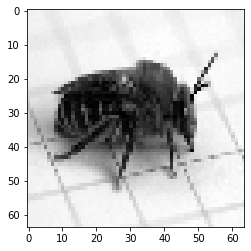

In [ ]:
# 저장한 이미지 1개 꺼내와 출력하기
plt.imshow(np.array(X[75]).reshape(64,64), cmap = 'gray')
plt.show()

In [ ]:
len(X)

157

In [ ]:
X = np.array(X)
y = np.array(Y).reshape(157,-1)

pprint(X) # 설명 변수
pprint(y) # 목적 변수

# 두 파일 하나로 붙이자!
# 이미지 픽셀 정보와 레이블 정보 하나로 만들기
Xy =  np.concatenate([X, y], axis=1) # 열방향 / pandas의 'merge()'와 동일 
Xy
np.save('ant_bee_img', Xy)

type:<class 'numpy.ndarray'>
shape:(157, 4096), ndim:2, dtype:int64
array data: 
 [[126 137 100 ... 184 169 163]
 [128 132 129 ... 122 110  88]
 [190 190 190 ... 122 129 110]
 ...
 [118 116 128 ... 109 114 110]
 [ 55  33  28 ...  80  88  81]
 [ 18  18  16 ... 187 205 207]]
type:<class 'numpy.ndarray'>
shape:(157, 1), ndim:2, dtype:int64
array data: 
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [

In [ ]:
# 배열을 각각 별도의 배열로 저장하기 
np.savez('ant_bee_arr', X, y) # array 구조로 이미지 저장 

### `numpy.dot()`: dot product 행렬에 대한 곱 
- 참고: https://seong6496.tistory.com/110
- 참고: https://jimmy-ai.tistory.com/75

In [ ]:
import numpy as np


##### 동일한 차원을 가진 행열 곱셈

In [ ]:
arr1 = np.array([1, 3, 5]) # 1 차원
arr2 = np.array([2, 4, 6]) # 1 차원

print(arr1.shape)
print(arr2.shape)

np.dot(arr1, arr2)
# 1차원 연산 -> 원소 갯수 동일해야 연산 가능! 
# 같은 자리값을 가진 원소 사이의 연산 후 모두 더해줌 

(3,)
(3,)


44

In [ ]:
arr1 = np.array([[1, 3], [2, 5]]) # 2 차원
arr2 = np.array([[2, 2], [1, 3]])

print(arr1.shape)
print(arr2.shape)

np.dot(arr1, arr2)
# 2차원 연산 -> 일반적인 행열 연산과 동일 ! 
# (m * k) * (k * n) = (m * n)
# 앞쪽 행열의 열과 뒤쪽 행열의 행과 같아야 연산 가능 !
# 최종 결과의 행열: (m * n)

(2, 2)
(2, 2)


array([[ 5, 11],
       [ 9, 19]])

##### 다차원 내적 : n차원 x 1차원

In [ ]:
arr1 = np.array([[1, 3], [2, 4]]) # 2 차원
arr2 = np.array([2, 2]) # 1차원

print(arr1.shape)
print(arr2.shape)

print(np.dot(arr1, arr2))
print(np.dot(arr1, arr2).shape)
# 2차원 행열 * 1차원 행열 = 1차원 행열

(2, 2)
(2,)
[ 8 12]
(2,)


In [ ]:
arr1 = np.array([[[1, 3], [2, 4]], [[1, 3], [2, 4]] ]) # 3 차원
arr2 = np.array([2, 2]) # 1차원

print(arr1.shape)
print(arr2.shape)

print(np.dot(arr1, arr2))
print(np.dot(arr1, arr2).shape)

(2, 2, 2)
(2,)
[[ 8 12]
 [ 8 12]]
(2, 2)


##### 다차원 행렬곱 : n차원 x m차원
왼쪽 array의 last axis, 오른쪽 array의 second last axis 끼리 곱한다고 되어있지만,

쉽게 설명하면 왼쪽 array의 각 행, 오른쪽 array의 각 열끼리

순서대로 내적을 수행한 결과를 반환하는 의미로 생각해두시면 좋습니다.

In [ ]:
arr1 = np.array([[1, 3], [2, 5], [2, 2]]) # 2 차원
arr2 = np.array([[2, 2, 1], [1, 3, 1]])   # 2 차원

print(arr1.shape)
print(arr2.shape)

print(np.dot(arr1, arr2))
print(np.dot(arr1, arr2).shape)
# 2차원 연산 -> 일반적인 행열 연산과 동일 ! 

(3, 2)
(2, 3)
[[ 5 11  4]
 [ 9 19  7]
 [ 6 10  4]]
(3, 3)


In [ ]:
arr1 = np.array([[[1, 3], [2, 4]], [[1, 3], [2, 4]] ]) # 3 차원
arr2 = np.array([[2, 2], [2, 2]]) # 2차원

print(arr1.shape)
print(arr2.shape)

print(np.dot(arr1, arr2))
print(np.dot(arr1, arr2).shape)

# 

(2, 2, 2)
(2, 2)
[[[ 8  8]
  [12 12]]

 [[ 8  8]
  [12 12]]]
(2, 2, 2)


In [21]:
arr1 = np.array([[2, 2], [2, 2]]) 

arr2 = np.array([[[1, 3], [2, 4]], [[1, 3], [2, 4]] ]) # 3 차원


print(arr1.shape)
print(arr2.shape)

print(np.dot(arr1, arr2))
print(np.dot(arr1, arr2).shape)

(2, 2)
(2, 2, 2)
[[[ 6 14]
  [ 6 14]]

 [[ 6 14]
  [ 6 14]]]
(2, 2, 2)
